# Clustering Star Wars Reviews

In [1]:
import numpy as np
import pandas as pd

import nltk
import spacy
import textacy

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
% matplotlib inline

In [2]:
review_data = pd.read_csv("../rotten_tomatoes/reviews.csv")
review_data = review_data.drop_duplicates()

In [3]:
nlp = spacy.load('en')

In [4]:
review_data.head()

,date,review,star_rating,name
0,"December 24, 2017",One start only because of the special effects.,1.0,Ed F
1,"December 24, 2017",When I heard Disney had purchased Star Wars so...,0.5,Hals R
2,"December 24, 2017","""Just breathe"" and go see it a second time. En...",4.0,Ian A
3,"December 24, 2017","If you need to keep checking your watch, the m...",1.0,M M
4,"December 24, 2017",Just hated it. Wanted this movie to make some ...,0.5,James N


## Clustering with DBSCAN

We can use `DBSCAN` to find reviews with similar meanings.

In [5]:
from sklearn.cluster import DBSCAN

reviews = nlp.pipe(review_data.review, n_threads = 4, batch_size = 150, cleanup = True)
X = np.array([rev.vector for rev in reviews])

dbs = DBSCAN(eps=7, min_samples=2, metric='euclidean', metric_params=None, 
             algorithm='auto', leaf_size=1, p=None, n_jobs=-1)

clusters = dbs.fit_predict(X)
review_data['cluster'] = clusters
(review_data.cluster
     .value_counts()
     .plot(kind = 'bar', title = 'cluster counts', logy = True))

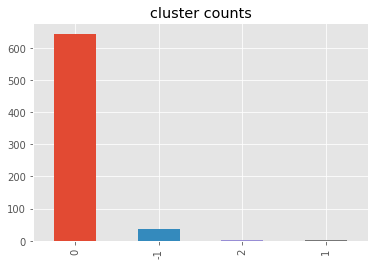

In [102]:
(review_data.cluster
     .value_counts()
     .plot(kind = 'bar', title = 'cluster counts'))

In [115]:
review_data.loc[~review_data.cluster.isin([1, 2]), 'star_rating']

0      1.0
1      0.5
2      4.0
3      1.0
4      0.5
5      4.5
6      0.5
7      2.5
8      0.0
9      1.5
10     0.5
11     2.0
12     1.5
13     1.0
14     0.5
15     3.0
16     5.0
17     5.0
18     2.0
19     0.5
20     4.0
21     0.5
22     0.5
23     0.0
24     0.0
25     3.5
38     0.0
39     2.0
40     2.0
41     0.5
      ... 
813    2.0
814    0.5
815    5.0
816    0.5
817    0.5
818    0.5
819    0.5
820    0.5
821    1.0
822    1.0
823    2.0
824    0.5
825    1.0
826    1.0
827    0.0
828    0.5
829    1.0
830    1.0
831    1.0
832    0.5
833    1.0
834    0.5
835    5.0
836    0.0
837    0.5
838    1.0
839    4.0
840    1.0
841    0.5
842    2.0
Name: star_rating, Length: 681, dtype: float64

cluster
-1    AxesSubplot(0.125,0.125;0.775x0.755)
 0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: star_rating, dtype: object

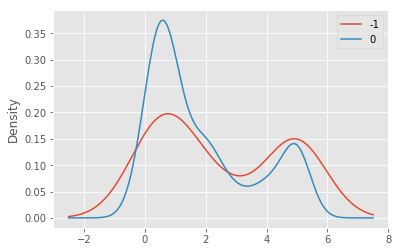

In [121]:
(review_data
     [~review_data.cluster.isin([1, 2])]
     .groupby('cluster')
     ['star_rating']
     .plot(kind = 'density', legend = True)
)

In [95]:
review_data[review_data.cluster == 1]

,date,review,star_rating,name,cluster
187,"December 24, 2017",So bad in so many ways....,0.5,,1
387,"December 24, 2017",Very bad on many levels.,0.5,Dave A,1


In [96]:
review_data[review_data.cluster == 2]

,date,review,star_rating,name,cluster
586,"December 24, 2017",JUST THE WORST!!!!!!! THEY KILL LUKE SKYWALKER...,0.5,,2
619,"December 24, 2017",Oh my!!! No!!! All these years waiting and thi...,0.5,,2


In [128]:
for r in review_data[review_data.cluster == 0].sample(10).review.values:
    print(r)
    print("\n------------------------\n")

Lazy writing, bad dialogue and worse character development (or lack there of). Some pretty cool moments though.

------------------------

This social justice warrior movie makes me sick

Snoke was pointless and turns out not to be a major character at all. For someone so strong, he was sure killed easily and in a pathetic way. 

Rey is nobody....

Luke is a coward who then dies because he used the force. 

Han and Luke are dead. Carrie Fisher RIP can't be in the next movie. There's the 3 big heros gone.

Forced an inappropriately timed humor. 

Dumb script

Horrible plot 

Chewy had 1 minute of screen time

Still unoriginal/ similar plot to episode 5 just like force awakens had an almost identical plot to a new hope 

Finn could have sacrificed himself to save to rebel base but that dumb girl rose stopped him, ruining a possibility of a good plot point and a beautiful sacrifice for three greater good. 

How did phasma get off starkiller base, is sheer really dead this time? 

How did 